In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics, model_selection

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassRNMulticlase import RNMulticlase

In [7]:
datos = pd.read_csv('../../Datos/iris.csv')
datos

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
X = np.array(datos.iloc[:, :4])
T = np.array(datos['class'])
nomClases = datos['class'].value_counts()
# creating instance of one-hot-encoder
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
T = enc.fit_transform(T.reshape(-1,1)).toarray()
print(T)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [9]:


print("Primeros ejemplos con sus valores de rta.esperados\n")
print("X\n", X[0:5,:])
print("T\n", T[0:5,:])

Primeros ejemplos con sus valores de rta.esperados

X
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
T
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [10]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split(X, T, test_size=0.50) #, random_state=42)
normalizador = preprocessing.StandardScaler()
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)


In [11]:
# Opciones para la función de activación: 'sigmoid', 'tanh' o 'softmax'
# Opciones para la función de costo : 'ECM', 'EC_binaria', 'EC'
# Combinaciones válidas: 'sigmoid'-'ECM', 'sigmoid'-'EC_binaria', 'tanh'-'ECM', 'softmax'-'EC'

funcion = 'sigmoid'  
funcionCOSTO = 'ECM'

if (funcion == 'tanh'):
    T_train = 2*T_train-1
    T_test  = 2*T_test-1

rn = RNMulticlase(alpha=0.1, n_iter=800, cotaE=1e-06, FUN=funcion, COSTO=funcionCOSTO, random_state=None)
resul = rn.fit(X_train, T_train)

In [12]:
print("Pesos obtenidos\n")
print(rn.w_)
print(rn.b_)

Pesos obtenidos

[[-0.64118902  1.52579285 -3.03686577 -2.05641971]
 [-0.82025101 -0.76430037  3.53726574 -2.62450035]
 [-0.72997915 -1.1348382   6.50830113  4.16643156]]
[[-2.69285687]
 [-0.74254003]
 [-7.04176136]]


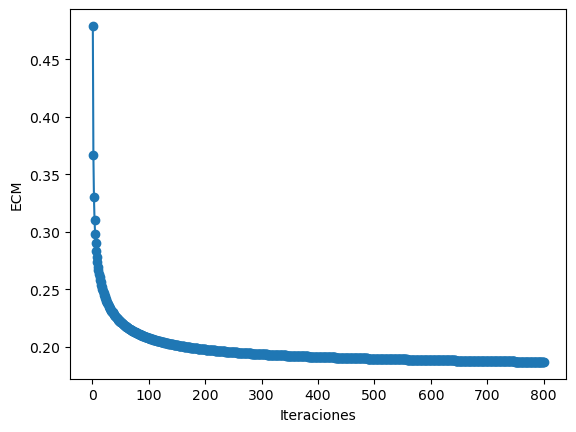

In [13]:
plt.plot(range(1, len(rn.errors_) + 1), rn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel(funcionCOSTO)
plt.show()

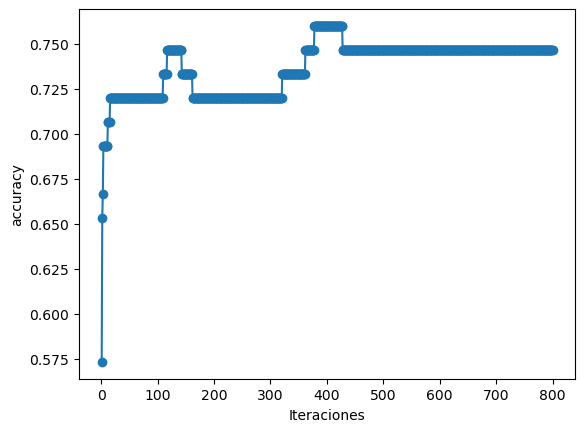

In [14]:
plt.plot(range(1, len(rn.accuracy_) + 1), rn.accuracy_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('accuracy')
plt.show()

In [15]:
#-- accuracy en entrenamiento y testeo ---
acc_Train = rn.accuracy(X_train, T_train)
acc_Test = rn.accuracy(X_test, T_test)
print("acc.Train = %.2f    acc.Test = %.2f" % (acc_Train, acc_Test))

acc.Train = 0.75    acc.Test = 0.75


## Otras funciones de RNMulticlase

In [16]:
# netas de la capa de salida
netas = rn.net_input(X_test[:5, :])
np.round(netas,2)

array([[ -6.02,  -0.39,  -2.47],
       [ -7.21,  -0.65,   2.1 ],
       [  6.8 ,  -2.77, -21.61],
       [  5.  ,  -2.74, -20.34],
       [ -7.82,   2.65,   1.47]])

In [17]:
# aplicamos la función de activación
print("Funcion de activacion : ", funcion)
salidas = rn.evaluar(netas)
np.round(salidas,2)

Funcion de activacion :  sigmoid


array([[0.  , 0.4 , 0.08],
       [0.  , 0.34, 0.89],
       [1.  , 0.06, 0.  ],
       [0.99, 0.06, 0.  ],
       [0.  , 0.93, 0.81]])

In [18]:
# salida continua de cada neurona
y_hat = rn.predict_nOut(X_test[:5, :])

print("valores obtenidos")
print(np.round(y_hat,2))

valores obtenidos
[[0.   0.4  0.08]
 [0.   0.34 0.89]
 [1.   0.06 0.  ]
 [0.99 0.06 0.  ]
 [0.   0.93 0.81]]


In [19]:
# Para las funciones sigmoides, los valores obtenidos deben ser 
# convertidos en binario ANTES de comparar con la rta esperada
# La función softmax responde la posición del máximo
print("valores obtenidos")
print(np.round(y_hat,2))

if (funcion=='tanh'):
    y_hat = (y_hat>0)*1
    
if (funcion=='sigmoid'):
    y_hat = (y_hat>0.5)*1

print("\nvalores obtenidos luego de convertirlos en binario")
print(y_hat)   
   
print("\nvalores esperados")
print(T_test[:5, :])     

valores obtenidos
[[0.   0.4  0.08]
 [0.   0.34 0.89]
 [1.   0.06 0.  ]
 [0.99 0.06 0.  ]
 [0.   0.93 0.81]]

valores obtenidos luego de convertirlos en binario
[[0 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 1]]

valores esperados
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [20]:
y_binario = rn.predict(X_test[:5, :])
print(y_binario)
print(np.argmax(T_test[:5,:], axis=1))

[0 2 0 0 1]
[1 2 0 0 2]


In [21]:
rn.accuracy(X_test[:5, :], T_test[:5, :])

0.6